In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jacobsohn, Mr. Sidney Samuel",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 결측치 처리하기 train.Embarked & test.Fare

print(train["Embarked"].isnull().sum())
train[train["Embarked"].isnull()]

2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
train.groupby(["Embarked"]).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


In [8]:
train["Embarked"] = train["Embarked"].fillna("S")
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [11]:
age_over_60 = test.groupby(train["Age"] >= 60)["Fare"]
age_over_60_mean = age_over_60.mean()

In [12]:
test["Fare"] = test["Fare"].fillna(age_over_60_mean[1])

In [13]:
test["Fare"].isnull().sum()

0

In [14]:
test.iloc[152, -3] = age_over_60_mean[1]

In [15]:
train["Age"] = train["Age"].fillna(train["Age"].mean().astype(int))

In [16]:
test["Age"] = test["Age"].fillna(train["Age"].mean().astype(int))

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
sel = ["Pclass", "SibSp", "Parch", "Age"]

X_train = train[sel]
X_test = test[sel]
y_train = train["Survived"]

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_pred[: 15]

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [19]:
train["Sex"] = train["Sex"].map({"female":1, "male":0}).astype(int)
test["Sex"] = test["Sex"].map({"female":1, "male":0}).astype(int)

train["Embarked"] = train["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
test["Embarked"] = test["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)

In [20]:
train.groupby(["Pclass", "Sex", "Survived"]).count()

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex Survived                                                       
1      0   0                  77    77   77     77     77      77    77   
           1                  45    45   45     45     45      45    45   
       1   0                   3     3    3      3      3       3     3   
           1                  91    91   91     91     91      91    91   
2      0   0                  91    91   91     91     91      91    91   
           1                  17    17   17     17     17      17    17   
       1   0                   6     6    6      6      6       6     6   
           1                  70    70   70     70     70      70    70   
3      0   0                 300   300  300    300    300     300   300   
           1                  47    47   47     47     47      47    47   
       1   0                  72    72   72     72     72      72    72   
           1                  72    72   72     72     72      72    72   

                     Cabin  Embarked  
Pclass Sex Survived                   
1      0   0            56        77  
           1            39        45  
       1   0             3         3  
           1            78        91  
2      0   0             2        91  
           1             4        17  
       1   0             1         6  
           1             9        70  
3      0   0             4       300  
           1             2        47  
       1   0             2        72  
           1             4        72

In [21]:
train["Name"].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [22]:
selected = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]

X_train = train[selected]
y_train = train["Survived"]

X_test = test[selected]

In [23]:
X_train.corr()

,Pclass,Sex,Age,SibSp,Parch,Embarked
Pclass,1.000000,-0.131900,-0.334974,0.083081,0.018443,0.045702
Sex,-0.131900,1.000000,-0.082949,0.114631,0.245489,0.116569
Age,-0.334974,-0.082949,1.000000,-0.232978,-0.176486,0.000615
SibSp,0.083081,0.114631,-0.232978,1.000000,0.414838,-0.059961
Parch,0.018443,0.245489,-0.176486,0.414838,1.000000,-0.078665
Embarked,0.045702,0.116569,0.000615,-0.059961,-0.078665,1.000000


<AxesSubplot:>

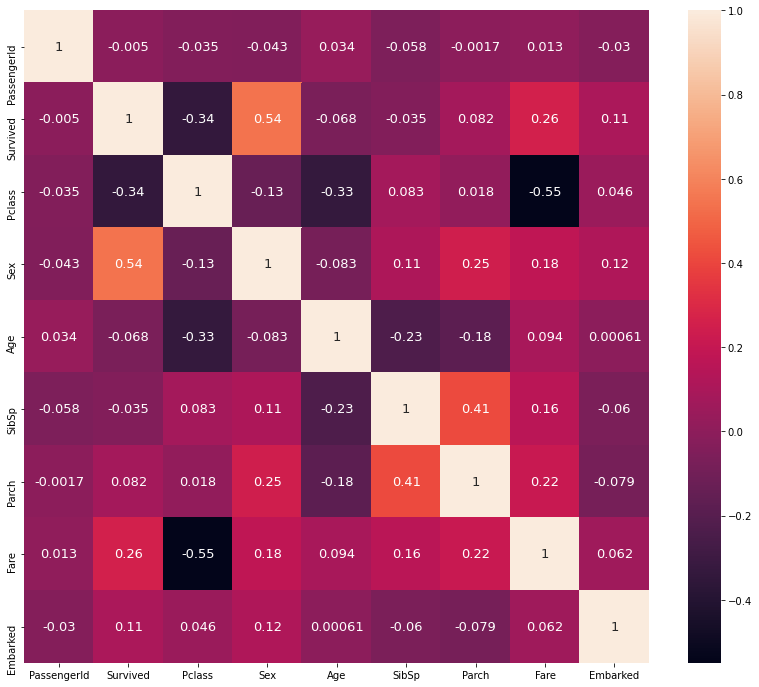

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
sns.heatmap(train.corr(), annot=True, annot_kws={"size": 13})

In [25]:
train.loc[train["Cabin"].isna(), "Cabin_bool"] = 1
train.loc[train["Cabin"].notna(), "Cabin_bool"] = 0

In [26]:
train["Cabin_bool"] = train["Cabin_bool"].astype(int)

In [27]:
test.loc[test["Cabin"].isna(), "Cabin_bool"] = 1
test.loc[test["Cabin"].notna(), "Cabin_bool"] = 0
test["Cabin_bool"] = test["Cabin_bool"].astype(int)

selected = ["Pclass", "SibSp", "Parch", "Age", "Cabin_bool"]
X_train = train[selected]
X_test = test[selected]
y_train = train["Survived"]

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)
y_pred[: 15]

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [28]:
def age_group(x):
    if x <= 10:
        return "Child"
    elif 10 < x <= 20:
        return "Teenage"
    elif 21 < x <= 30:
        return "Adult"
    elif 31 < x <= 50:
        return "Middle Age"
    else:
        return "Elder"

In [29]:
all_df = [train, test]

for one in all_df:
    one["Title"] = one["Name"].str.extract('([A-Za-z]+)\.', expand=False)

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_bool,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,Mr


In [30]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Mme           1
Don           1
Ms            1
Countess      1
Sir           1
Jonkheer      1
Capt          1
Lady          1
Name: Title, dtype: int64

In [31]:
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [32]:
for data in all_df:
    data["Title"] = data["Title"].replace(["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", \
                                           "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    
    data["Title"] = data["Title"].replace("Mlle", "Miss")
    data["Title"] = data["Title"].replace("Ms", "Miss")
    data["Title"] = data["Title"].replace("Mme", "Mrs")

In [33]:
test["Title"].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [34]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}

for data in all_df:
    data["Title"] = data["Title"].map(title_mapping)
    data["Title"] = data["Title"].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_bool,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1


In [35]:
for data in all_df:
    data["Family_size"] = data["SibSp"] + data["Parch"] + 1

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_bool,Title,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,3,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,3,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,1
5,6,0,3,"Moran, Mr. James",0,29.0,0,0,330877,8.4583,NaN,2,1,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0,0,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0,1,4,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0,1,3,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1,1,3,2


In [36]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_bool,Title,Family_size
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1,3,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,1,1,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,1,3,3
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,0,1,1,1
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2,1,2,1
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0,1,1,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,1,1,3,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,0,1,1,3


In [37]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}

for data in all_df:
    data["Title"] = data["Title"].map(title_mapping)
    data["Title"] = data["Title"].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_bool,Title,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0.0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,0.0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0.0,1


In [38]:
all_titanic = pd.concat([train, test], join='inner')
all_titanic.shape, all_titanic.columns

((1309, 14),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_bool', 'Title',
        'Family_size'],
       dtype='object'))

In [39]:
# qcut
all_titanic["qcut_Age"] = pd.qcut(all_titanic["Age"], 5, labels=False)
all_titanic.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_bool,Title,Family_size,qcut_Age
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0.0,2,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0.0,2,3
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0.0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,0.0,2,3
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0.0,1,3
5,6,3,"Moran, Mr. James",0,29.0,0,0,330877,8.4583,NaN,2,1,0.0,1,2
6,7,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0,0,0.0,1,4
7,8,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0,1,0.0,5,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0,1,0.0,3,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1,1,0.0,2,0


In [40]:
print(train.shape, test.shape)
print(all_titanic.shape)

(891, 15) (418, 14)
(1309, 15)


In [41]:
train_df = all_titanic.iloc[:891, :]
test_df = all_titanic.iloc[891:, :]

train_df.shape, test_df.shape

((891, 15), (418, 15))

In [42]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_bool,Title,Family_size,qcut_Age
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,1,0.0,1,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1,0.0,2,4
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,1,0.0,1,4
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,1,0.0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,1,0.0,3,1


In [43]:
train_df = pd.concat([train_df, train["Survived"]], axis=1)
train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_bool,Title,Family_size,qcut_Age,Survived
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0.0,2,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0.0,2,3,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0.0,1,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,0.0,2,3,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,1,0.0,1,1,0
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,0,0.0,1,0,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.0,1,2,W./C. 6607,23.4500,NaN,0,1,0.0,4,2,0
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,0,0.0,1,1,1


In [44]:
all_titanic = pd.concat([train, test], join='inner')
all_titanic.shape

(1309, 14)

In [47]:
all_titanic["cut_Fare"] = pd.cut(all_titanic["Fare"], bins=10, labels=False)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_bool,Title,Family_size,cut_Fare
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0.0,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0.0,2,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0.0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,0.0,2,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0.0,1,0
5,6,3,"Moran, Mr. James",0,29.0,0,0,330877,8.4583,NaN,2,1,0.0,1,0
6,7,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0,0,0.0,1,1
7,8,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0,1,0.0,5,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0,1,0.0,3,0
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1,1,0.0,2,0


In [48]:
all_titanic["cut_Fare"].value_counts()

0    1071
1     154
2      42
4      21
5      13
3       4
9       4
Name: cut_Fare, dtype: int64

<AxesSubplot:xlabel='cut_Fare', ylabel='Count'>

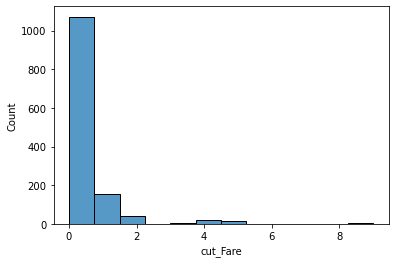

In [49]:
sns.histplot(all_titanic["cut_Fare"])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

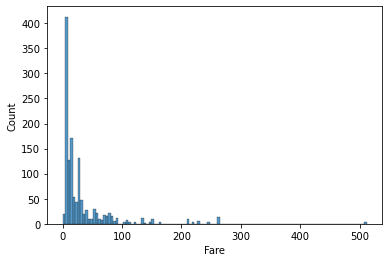

In [50]:
sns.histplot(all_titanic["Fare"])

In [51]:
train_df = all_titanic.iloc[:891, :]
test_df = all_titanic.iloc[891:, :]

train_df.shape, test_df.shape

((891, 15), (418, 15))